<IPython.core.display.Javascript object>


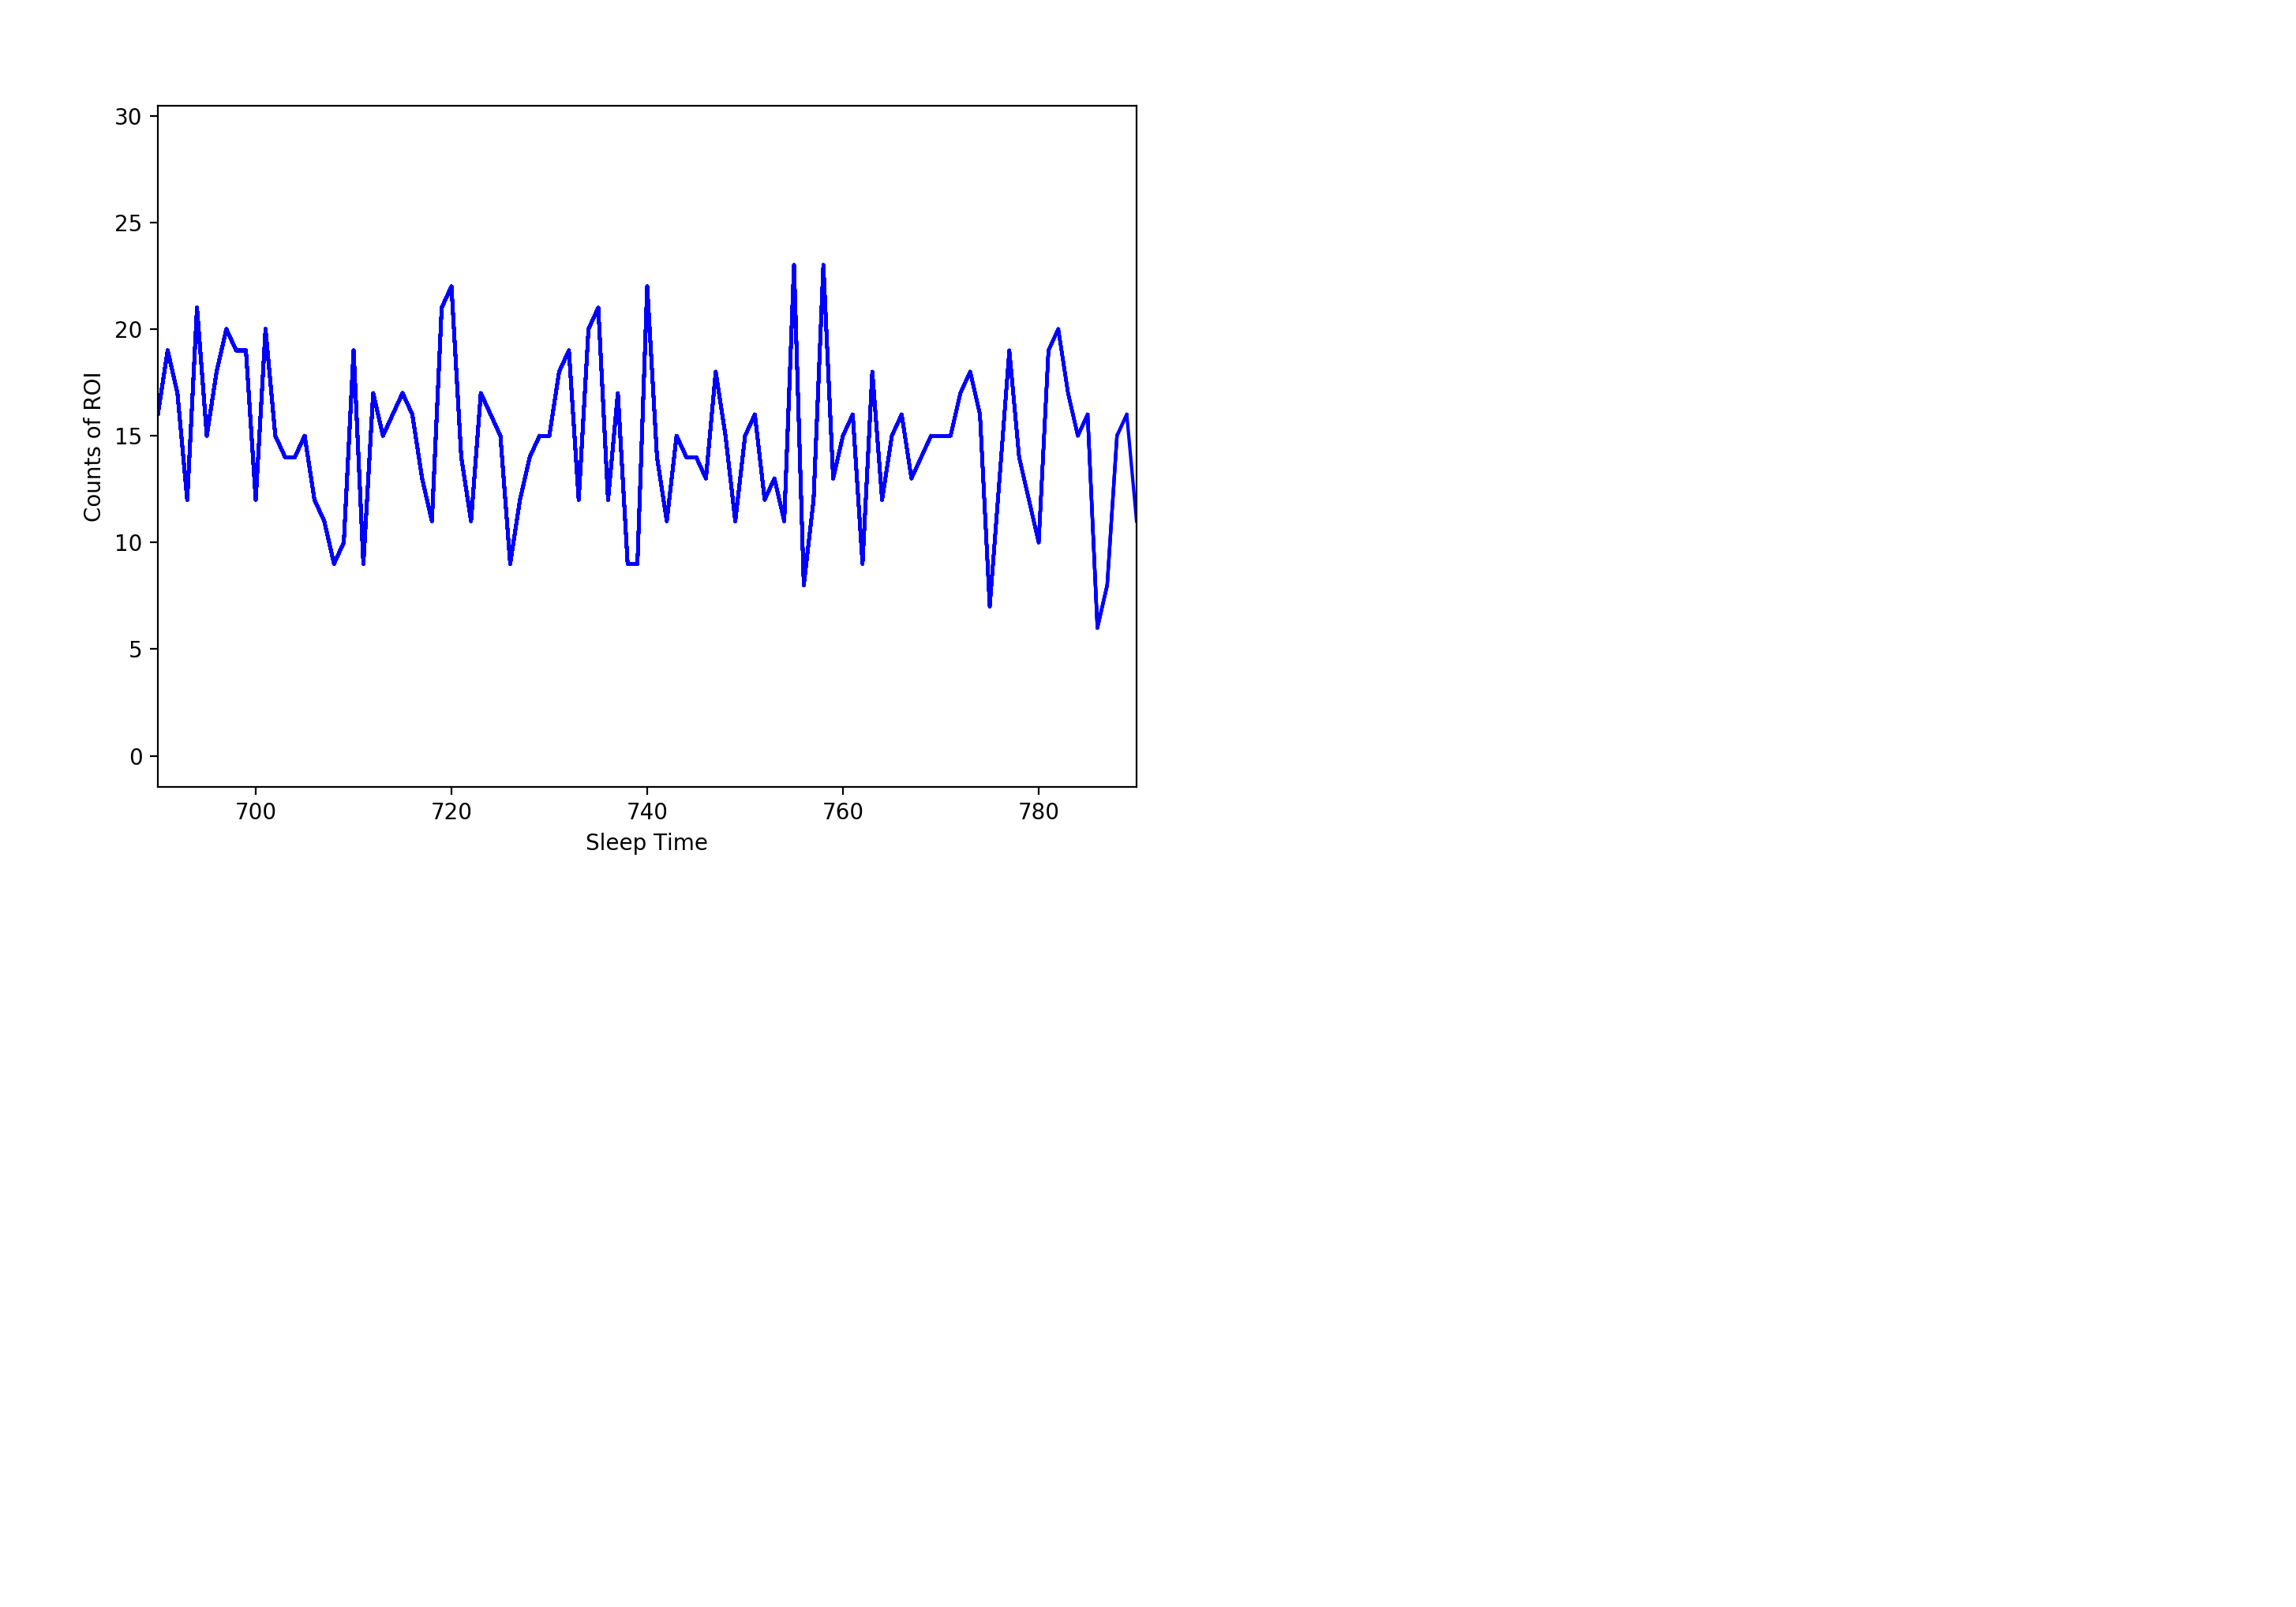

()


KeyboardInterrupt: 

In [2]:
%matplotlib notebook
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from electron_rigol_class import *
try:
    import TimeTagger
except:
    print ("Time Tagger lib is not in the search path.")
    pyversion = sys.version_info
    from winreg import ConnectRegistry, OpenKey, HKEY_LOCAL_MACHINE, QueryValueEx
    registry_path = "SOFTWARE\\Python\\PythonCore\\" + str(pyversion.major) + "." + str(pyversion.minor) + "\\PythonPath\\Time Tagger"
    reg = ConnectRegistry(None, HKEY_LOCAL_MACHINE)
    key = OpenKey(reg, registry_path) 
    module_path = QueryValueEx(key,'')[0]
    print ("adding " + module_path)
    sys.path.append(module_path)
    
from TimeTagger import createTimeTagger, Counter, Countrate, Histogram, LOW, HIGH, freeTimeTagger, scanTimeTagger, ConstantFractionDiscriminator
from time import sleep
from pylab import *

def plt_dynamic(x, y, ax, colors=['b']):
    for color in colors:
        ax.plot(x, y, color)
    fig.canvas.draw()
    

fig,ax = plt.subplots(1,1, figsize = (8, 5.6), dpi = 200)
ax.set_xlabel('Sleep Time') ; ax.set_ylabel('Counts of ROI')
# ax.set_xlim(0,360) ; ax.set_ylim(-1,1)
x_range = 100
xs, ys = [], []

print (scanTimeTagger())
# scanTimeTagger()
# freeTimeTagger()
# scanTimeTagger()
# tagger.reset()
# print (scanTimeTagger())

# create a timetagger instance
tagger = createTimeTagger()
# print (scanTimeTagger())
tagger.reset()
tagger.setTriggerLevel(2, 0.5)
tagger.setDeadtime(2, 100000)
# Ch2_CFD = ConstantFractionDiscriminator(tagger,[2], search_window = 10000)
# test = Ch2_CFD.getChannels()
print (test)
# Rigol
sampling_time = 100.E-9
rigol =  rigol(sampling_time)

###############################
# Set up experiment: variable parameters
###############################
U2 = -0.5
# parameters for the Rigol waveforms
pulse_width_ao = 200 * 1.E-6
wait_time = 10000.E-6
pulse_delay_ao = sampling_time

pulse_width_ej = 20.E-9
pulse_delay_ej = 2.E-9
delay = 0
# exp_cycles = 1E5  # how many experiment repetitions
################################
# program and switch on Rigol, returns repetition period in s
cycle_duration,wait_time_corr = rigol.run(pulse_width_ao, pulse_delay_ao, pulse_width_ej, pulse_delay_ej, wait_time)
###############################
binwidth = 1000
n_bins = 300
# n_bins = np.int(cycle_duration/binwidth*1E12 - 100)
histo = Histogram(tagger, click_channel = 2, start_channel = 1, binwidth = 1000, n_bins = 300)
# histo = Histogram(tagger, click_channel = test[0], start_channel = 1, binwidth = 1000, n_bins = 300)
for x in range(1000):
    tagger.sync()
    histo.clear()
    sleep(1)
    data = histo.getData()
    y = np.sum(data[80:130])
    if x <= x_range:
        ax.set_xlim(0,x_range)
    else:
        ax.set_xlim(x-x_range,x)
    xs.append(x)
    ys.append(y)
    plt_dynamic(xs, ys, ax)
#     sleep(0.2)
plt_dynamic(xs, ys, ax)


In [ ]:
scanTimeTagger()
freeTimeTagger(tagger)
scanTimeTagger()
tagger.reset()

In [ ]:
# print (roi)
# plt.figure()
# plt.plot(np.arange(0.001,1.101,0.1),roi)
# plt.show()
scanTimeTagger()
freeTimeTagger(tagger)
scanTimeTagger()
tagger.reset()